<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/DetectiondePeau2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de détection de la peau par la méthode Bayésienne.

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 401 (delta 48), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (401/401), 31.11 MiB | 10.95 MiB/s, done.
Resolving deltas: 100% (202/202), done.
/content/INF8770


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as fltr

Lecture d'images d'échantillons de peau et de non peau. Notez qu'il y a plus d'échantillons de peau que non peau. Non peau n'est pas très varié. 

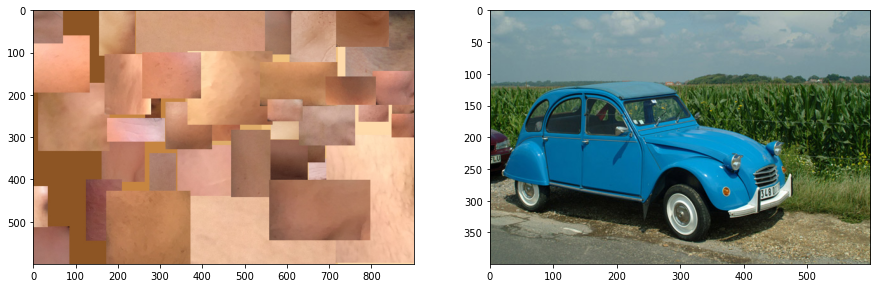

In [3]:
plt.figure(figsize = (15,20))
plt.subplot(121)
imagePeau = plt.imread('EchPeau.jpg')  
plt.imshow(imagePeau)
plt.subplot(122)
imageNonPeau = plt.imread('RGB.jpg')  
plt.imshow(imageNonPeau)
plt.show()

Calcul des histogrammes pour Peau et Non Peau. On utilise un histogramme de triplets RGB. 

In [4]:
Qu = 8.0   #Niveau de quantification des couleurs
HistoPeau = np.zeros((int(256.0/Qu),int(256.0/Qu),int(256.0/Qu)),dtype=np.float)
for i in range(0,len(imagePeau)):
    for j in range(0,len(imagePeau[0])):
        HistoPeau[int(imagePeau[i][j][0]/Qu)][int(imagePeau[i][j][1]/Qu)][int(imagePeau[i][j][2]/Qu)] += 1

In [5]:
HistoNonPeau = np.zeros((int(256.0/Qu),int(256.0/Qu),int(256.0/Qu)),dtype=np.float)
for i in range(0,len(imageNonPeau)):
    for j in range(0,len(imageNonPeau[0])):
        HistoNonPeau[int(imageNonPeau[i][j][0]/Qu)][int(imageNonPeau[i][j][1]/Qu)][int(imageNonPeau[i][j][2]/Qu)] += 1


Transformation des histogrammes en densité de probabilité. On divise par le nombre total de pixels.

In [6]:
HistoPeau = HistoPeau/(len(imagePeau)*len(imagePeau[0]))
HistoNonPeau = HistoNonPeau/(len(imageNonPeau)*len(imageNonPeau[0]))

Lecture de l'image sur laquelle nous allons appliquer la détection. 

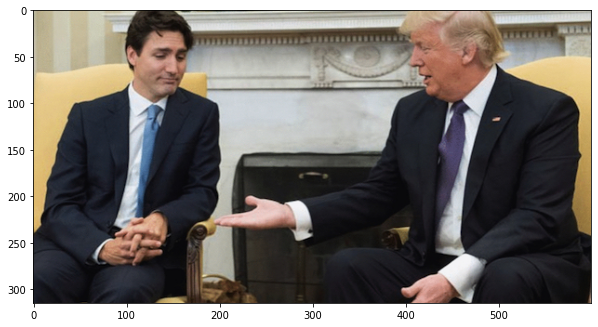

In [7]:
plt.figure(figsize = (10,10))
image = plt.imread('Trudeau.jpg')
plt.imshow(image)
plt.show()

In [8]:
PixPeau = np.zeros((len(image),len(image[0])))
for i in range(len(image)):
    for j in range(len(image[0])):
        #Vérifie si la probabilité du pixel est plus grande d'être de la peau que non peau. 
        if HistoPeau[int(image[i][j][0]/Qu)][int(image[i][j][1]/Qu)][int(image[i][j][2]/Qu)] > \
            HistoNonPeau[int(image[i][j][0]/Qu)][int(image[i][j][1]/Qu)][int(image[i][j][2]/Qu)]:
            PixPeau[i][j] = True;
        else:
            PixPeau[i][j] = False;        

Affichage du résultat. Les performances sont meilleures que pour DetectionPeau1.

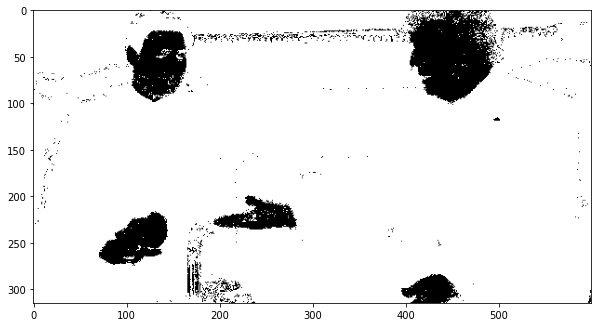

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(PixPeau, plt.get_cmap('binary'))
plt.show()

Extra: On peut éliminer un peu de bruit en appliquant un filter médian.

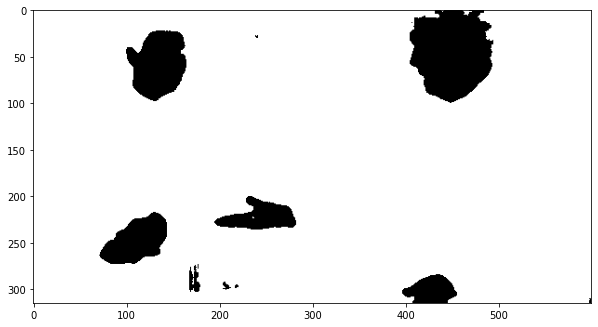

In [10]:
PixPeau = fltr.median_filter(PixPeau, size=(7, 7))
plt.figure(figsize = (10,10))
plt.imshow(PixPeau, plt.get_cmap('binary'))
plt.show()